In [1]:
# This code creates comparison plots for baseline, retrofit 2.5% and retrofit 5%
# probability loss at an LGS aggregation

# it assumes that AAL calculations.ipynb has already been run

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from scipy.integrate import simpson
from matplotlib import pyplot as plt
import seaborn as sns
from os.path import join as pjoin
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
lossdf1 = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro_5\structural_mean_SA1.csv", index_col=0)
lossdf2 = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro5_eligible\structural_mean_SA1.csv", index_col=0)
lossdf1_LGA = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro_5\structural_mean_LGA.csv", index_col=0)
lossdf2_LGA = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro5_eligible\structural_mean_LGA.csv", index_col=0)

lossdf4 = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro_5\structural_loss_sum_SA1.csv", index_col=0)
lossdf5 = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro5_eligible\structural_loss_sum_SA1.csv", index_col=0)
lossdf4_LGA = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro_5\structural_loss_sum_LGA.csv", index_col=0)
lossdf5_LGA = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro5_eligible\structural_loss_sum_LGA.csv", index_col=0)

aeps = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\pp_retro_5\structural_mean_aeps.csv", index_col=0)
OUTPATH = r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\eligibility_comp"

In [4]:
# LGAs
df = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\risk_baseline\2\windspeed_2_yr.csv")
df.drop(df.columns.difference(['SA1_CODE','LGA_CODE','LGA_NAME']), axis=1, inplace=True)
df.drop_duplicates(subset=['SA1_CODE'], inplace=True)
df.set_index('SA1_CODE', inplace=True)

LGAs_6 = ['Noosa (S)', 'Sunshine Coast (R)', 'Moreton Bay (R)', 'Brisbane (C)', 'Gold Coast (C)', 'Redland (C)']
LGAs = df[df['LGA_NAME'].isin(LGAs_6)]
LGAs = LGAs.drop_duplicates(subset=['LGA_NAME'])
LGAs = LGAs.reset_index()
LGAs = LGAs.drop(['SA1_CODE'],axis=1)
LGA_codes = df[df['LGA_NAME'].isin(LGAs_6)]

In [5]:
aeps = aeps.iloc[:,0]
aeps = aeps.to_numpy()

In [6]:
# aeps = np.array([0.6321205588, 0.3934693403, 0.2834686894, 0.2211992169, 0.1812692469, 0.095162582, 0.064493015, 0.0487705755, 0.0327838995, 0.028167125, 0.024690088, 0.0219771275, 0.0198013267, 0.0132448382, 0.0099501663, 0.0066444937, 0.0049875208, 0.0039920107, 0.0033277839, 0.0028530651, 0.0024968776, 0.0022197549, 0.0019980013, 0.0009995002, 0.000499875, 0.00039992, 0.00019998, 0.000099995])

In [7]:
# finding mean of structural loss ratio mean
# to create AAL prob plot
# SA1 agg
lossdf_b_ratio = lossdf1.mean(axis=0)
lossdf_b_ratio = lossdf_b_ratio.drop(['AAL'])

lossdf_25_ratio = lossdf2.mean(axis=0)
lossdf_25_ratio = lossdf_25_ratio.drop(['AAL'])


C:\Users\u12161\AppData\Local\Temp\ipykernel_9880\2137879819.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(lossdf_b_ratio, lossdf_25_ratio, labels=['Uniform', 'Eligible'])


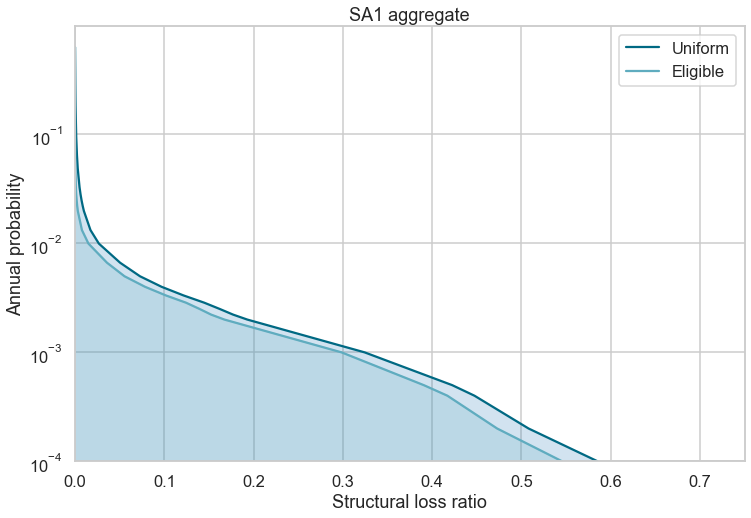

In [8]:

# creating AAL prob plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=lossdf_b_ratio, y=aeps, ax=ax, color="#006983")
sns.lineplot(x=lossdf_25_ratio, y=aeps, ax=ax, color="#5FACBF")
ax.set_yscale('log')
plt.xlim([0,0.75])
plt.ylim(bottom=0.0001)
ax.set_xlabel('Structural loss ratio')
ax.set_ylabel('Annual probability')
ax.set_title('SA1 aggregate')
plt.legend(lossdf_b_ratio, lossdf_25_ratio, labels=['Uniform', 'Eligible'])
ax.fill_between(lossdf_b_ratio, aeps, alpha=0.2)
ax.fill_between(lossdf_25_ratio, aeps, alpha=0.2, color="#5FACBF")
plt.savefig(pjoin(OUTPATH,
                f"SA1_probability_ratio"))


In [9]:
lossdf_b_loss = lossdf4.sum(axis=0)
lossdf_b_loss = lossdf_b_loss.drop(['AAL'])
lossdf_b_loss = lossdf_b_loss.div(1000000000)

lossdf_25_loss = lossdf5.sum(axis=0)
lossdf_25_loss = lossdf_25_loss.drop(['AAL'])
lossdf_25_loss = lossdf_25_loss.div(1000000000)


C:\Users\u12161\AppData\Local\Temp\ipykernel_9880\3658646270.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(lossdf_b_loss, lossdf_25_loss, labels=['Uniform', 'Eligible'])


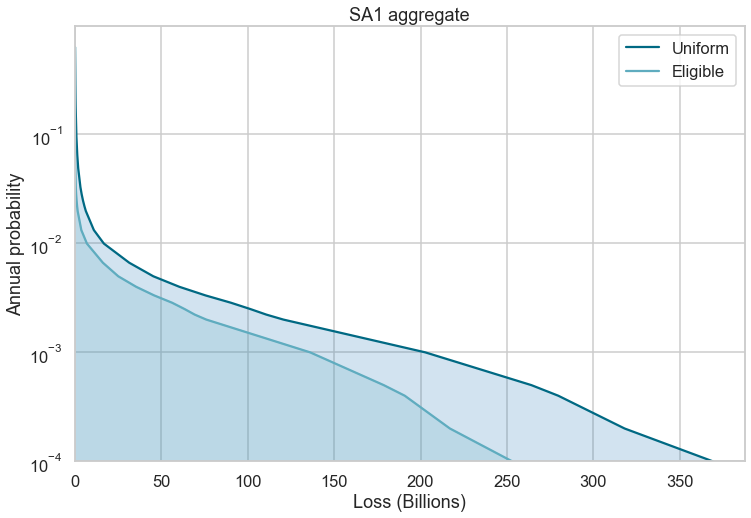

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=lossdf_b_loss, y=aeps, ax=ax, color="#006983")
sns.lineplot(x=lossdf_25_loss, y=aeps, ax=ax, color="#5FACBF")
ax.set_yscale('log')
plt.xlim(left=0)
plt.ylim(bottom=0.0001)
ax.set_xlabel('Loss (Billions)')
ax.set_ylabel('Annual probability')
ax.set_title('SA1 aggregate')
ax.fill_between(lossdf_b_loss, aeps, alpha=0.2)
ax.fill_between(lossdf_25_loss, aeps, alpha=0.2, color="#5FACBF")
plt.legend(lossdf_b_loss, lossdf_25_loss, labels=['Uniform', 'Eligible'])
plt.savefig(pjoin(OUTPATH,
                f"SA1_probability_loss"))

In [11]:
def plotaal_prob_ratio(df1,df2,lga_name,outpath):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=df1, y=aeps, ax=ax, color="#006983")
    sns.lineplot(x=df2, y=aeps, ax=ax, color="#5FACBF")
    ax.set_yscale('log')
    plt.xlim([0,0.75])
    plt.ylim(bottom=0.0001)
    ax.set_xlabel('Structural loss ratio')
    ax.set_ylabel('Annual probability')
    ax.set_title(lga_name)
    ax.fill_between(df1, aeps, alpha=0.2)
    ax.fill_between(df2, aeps, alpha=0.2, color="#5FACBF")
    plt.legend(labels=['Uniform', 'Eligible'])
    plt.savefig(pjoin(outpath,
                    f"{lga_name}_probability_ratio.png"))

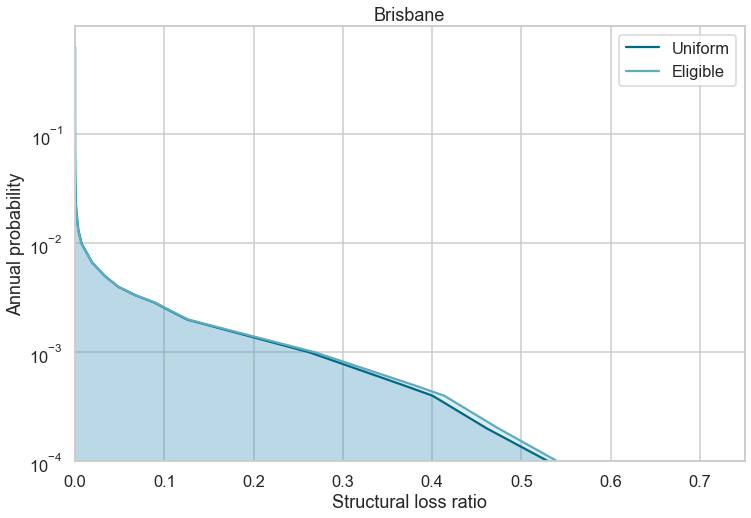

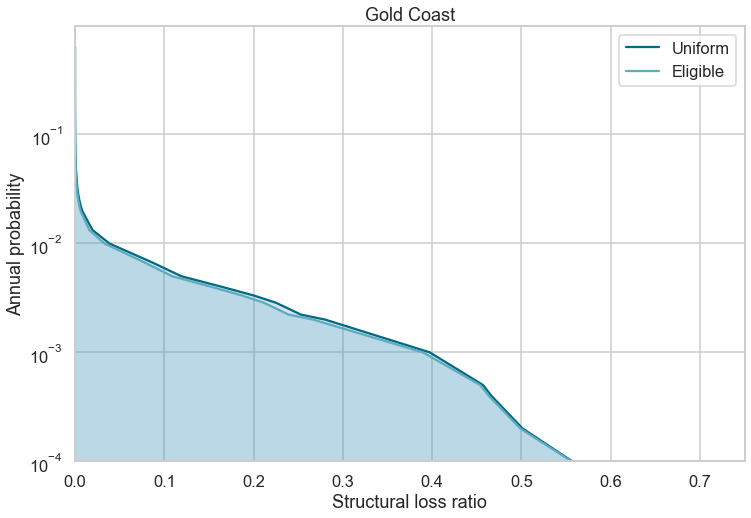

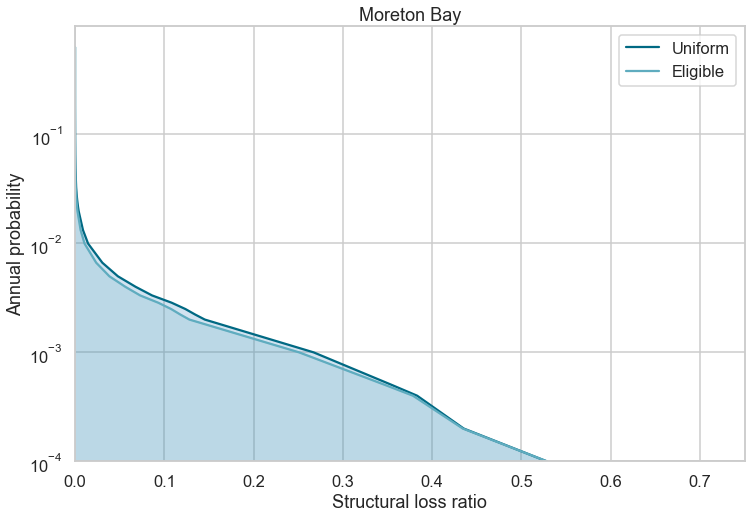

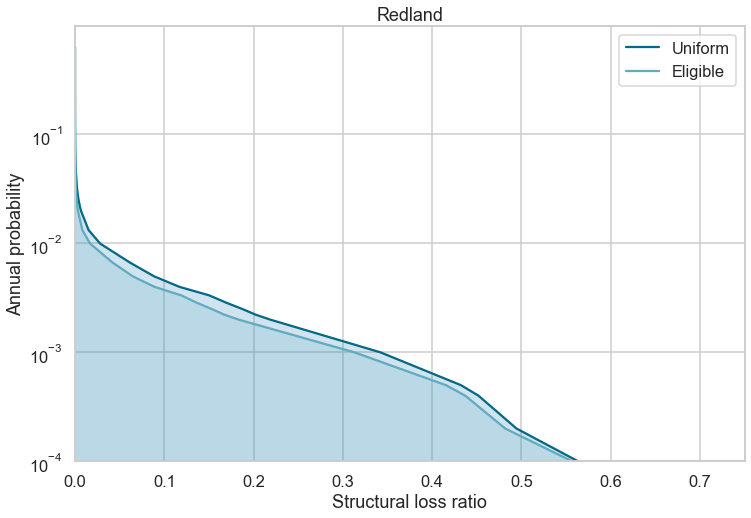

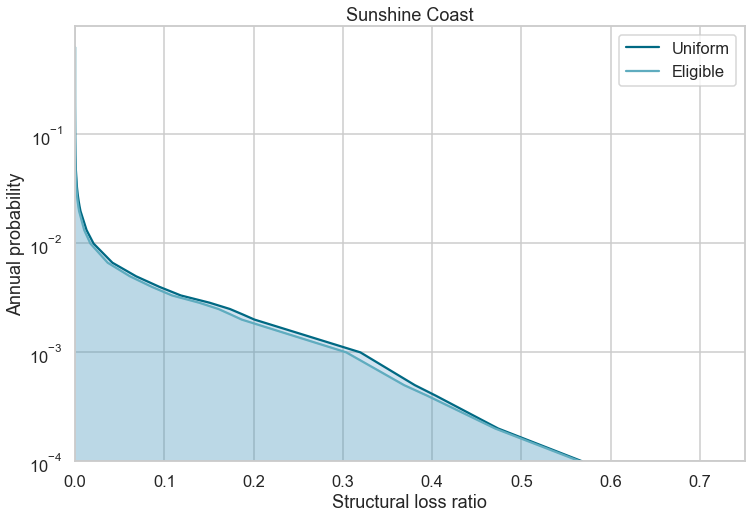

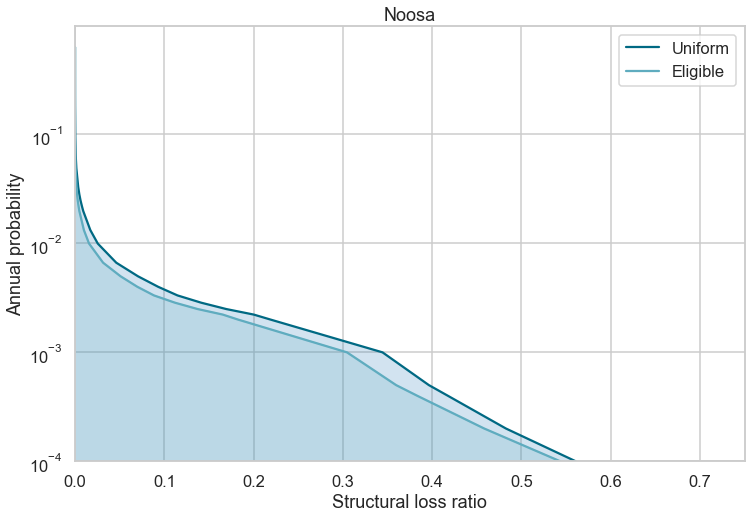

In [12]:
# seperating the 6 LGAs of interest
#creating count plot and prob plot
for index, LGA_code in LGAs.iterrows():
    LGAdf = df.loc[df['LGA_CODE'] == LGA_code['LGA_CODE']]
    LGAdf = LGAdf.reset_index()
    LGAdf = LGAdf.drop(LGAdf.index.to_list()[1:],axis = 0 )
    LGAname = LGA_code['LGA_NAME']
    LGAname = LGAname[:-4]
    lossdf_b_LGA_ratio = lossdf1_LGA.merge(LGAdf, left_index=True, right_on='LGA_CODE')
    lossdf_b_LGA_ratio = lossdf_b_LGA_ratio.drop(['AAL','SA1_CODE','LGA_CODE','LGA_NAME'], axis=1)
    lossdf_b_LGA_ratio = lossdf_b_LGA_ratio.transpose()
    lossdf_b_LGA_ratio = lossdf_b_LGA_ratio.iloc[:,0]
    lossdf_25_LGA_ratio = lossdf2_LGA.merge(LGAdf, left_index=True, right_on='LGA_CODE')
    lossdf_25_LGA_ratio = lossdf_25_LGA_ratio.drop(['AAL','SA1_CODE','LGA_CODE','LGA_NAME'], axis=1)
    lossdf_25_LGA_ratio = lossdf_25_LGA_ratio.transpose()
    lossdf_25_LGA_ratio = lossdf_25_LGA_ratio.iloc[:,0]
    plotaal_prob_ratio(lossdf_b_LGA_ratio,lossdf_25_LGA_ratio,LGAname,OUTPATH)

In [13]:
# for structural loss (cost)
def plotaal_prob_loss(df1,df2,lga_name,outpath):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=df1, y=aeps, ax=ax, color="#006983")
    sns.lineplot(x=df2, y=aeps, ax=ax, color="#5FACBF")
    ax.set_yscale('log')
    plt.xlim([0,90])
    plt.ylim(bottom=0.0001)
    ax.set_xlabel('Loss (Billions)')
    ax.set_ylabel('Annual probability')
    ax.fill_between(df1, aeps, alpha=0.2)
    ax.fill_between(df2, aeps, alpha=0.2, color="#5FACBF")
    ax.set_title(lga_name)
    plt.legend(labels=['Uniform', 'Eligible'])
    plt.savefig(pjoin(outpath,
                    f"{lga_name}_probability_loss.png"))

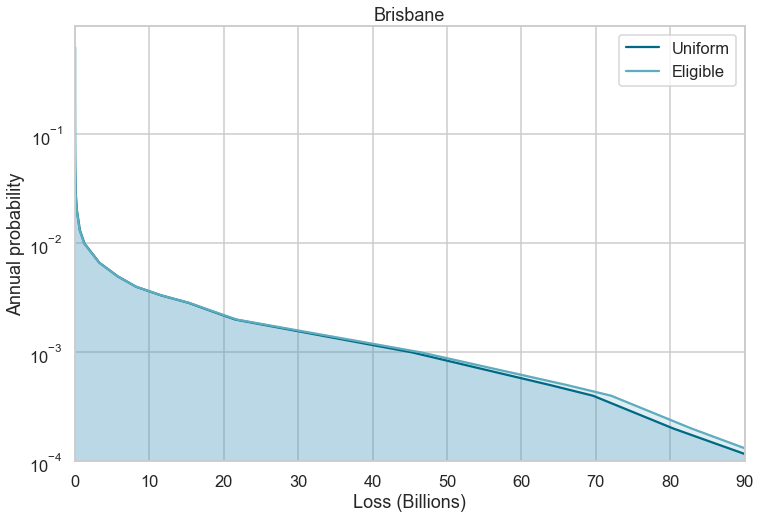

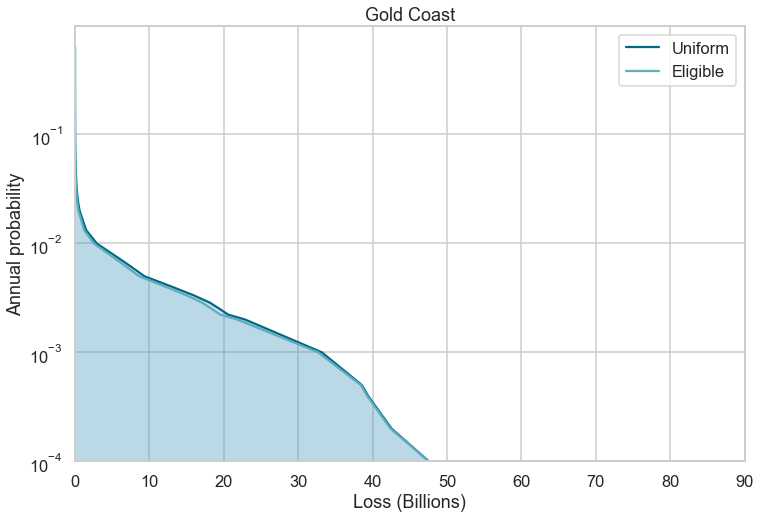

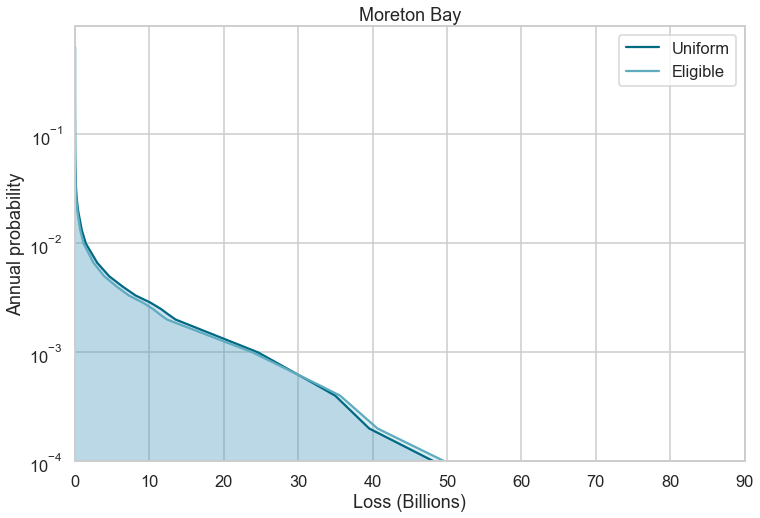

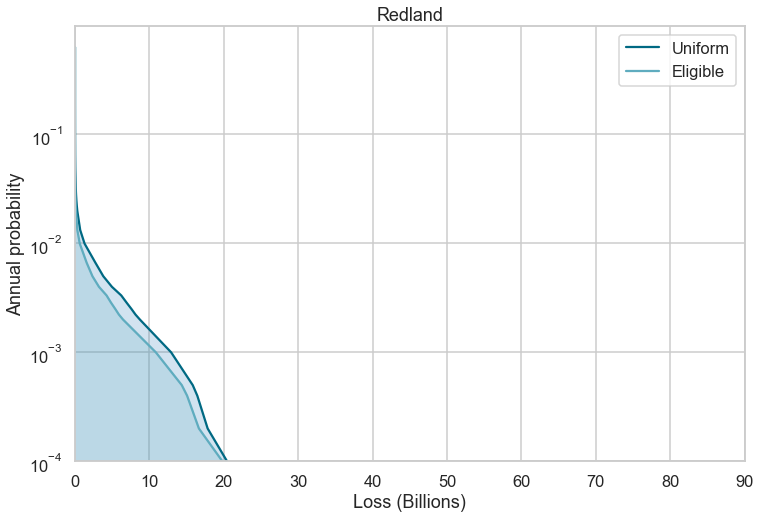

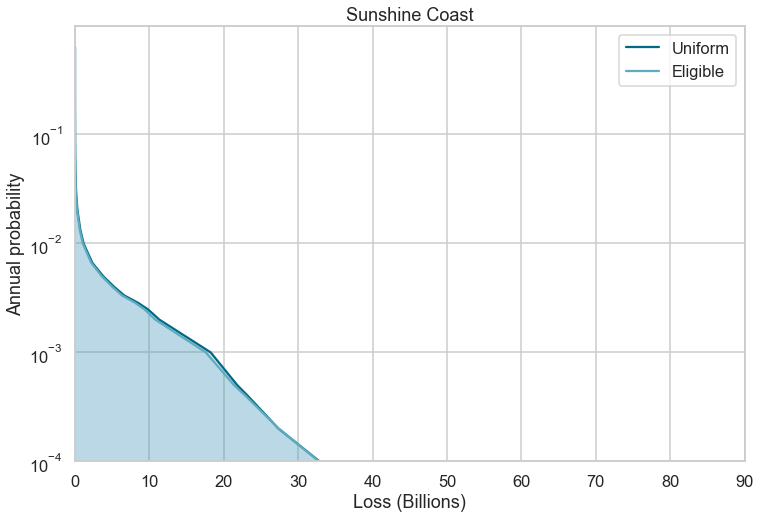

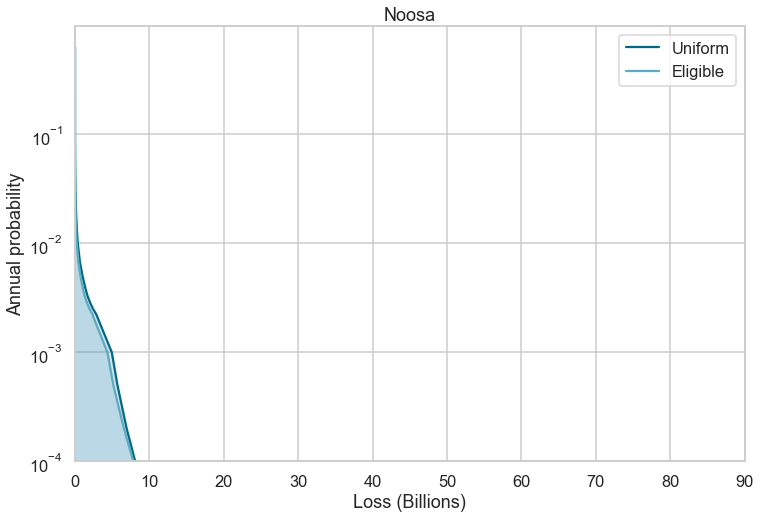

In [14]:
for index, LGA_code in LGAs.iterrows():
    LGAdf = df.loc[df['LGA_CODE'] == LGA_code['LGA_CODE']]
    LGAdf = LGAdf.reset_index()
    LGAdf = LGAdf.drop(LGAdf.index.to_list()[1:],axis = 0 )
    LGAname = LGA_code['LGA_NAME']
    LGAname = LGAname[:-4]
    lossdf_b_LGA_loss = lossdf4_LGA.merge(LGAdf, left_index=True, right_on='LGA_CODE')
    lossdf_b_LGA_loss = lossdf_b_LGA_loss.drop(['AAL','SA1_CODE','LGA_CODE','LGA_NAME'], axis=1)
    lossdf_b_LGA_loss = lossdf_b_LGA_loss.div(1000)
    lossdf_b_LGA_loss = lossdf_b_LGA_loss.transpose()
    lossdf_b_LGA_loss = lossdf_b_LGA_loss.iloc[:,0]
    lossdf_25_LGA_loss = lossdf5_LGA.merge(LGAdf, left_index=True, right_on='LGA_CODE')
    lossdf_25_LGA_loss = lossdf_25_LGA_loss.drop(['AAL','SA1_CODE','LGA_CODE','LGA_NAME'], axis=1)
    lossdf_25_LGA_loss = lossdf_25_LGA_loss.div(1000)
    lossdf_25_LGA_loss = lossdf_25_LGA_loss.transpose()
    lossdf_25_LGA_loss = lossdf_25_LGA_loss.iloc[:,0]
    plotaal_prob_loss(lossdf_b_LGA_loss,lossdf_25_LGA_loss,LGAname,OUTPATH)